In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
from PIL import Image

%matplotlib inline

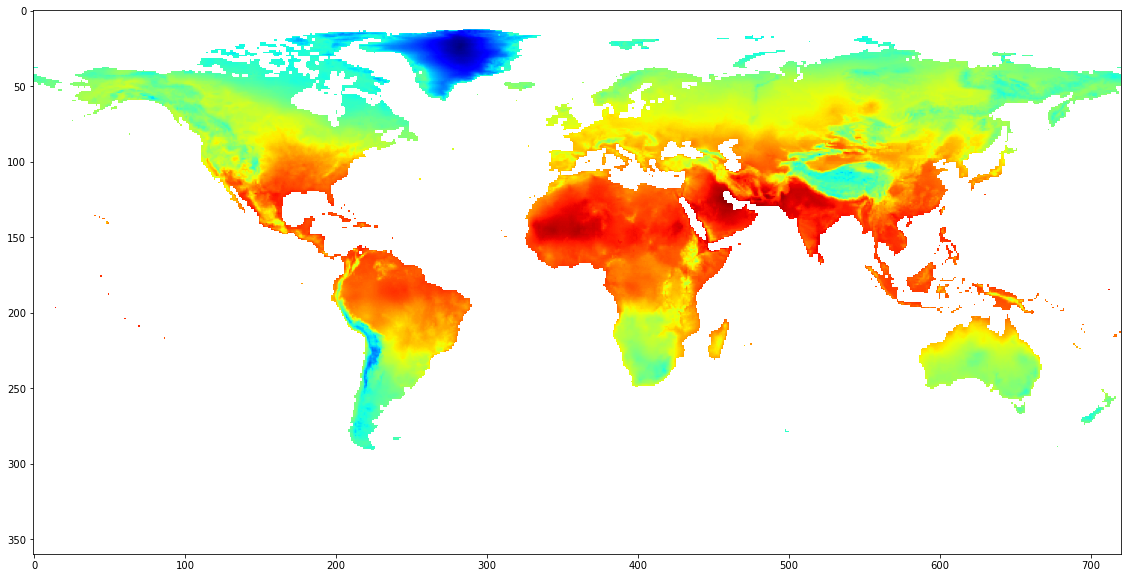

error: OpenCV(4.5.1) /tmp/pip-req-build-ms668fyv/opencv/modules/imgproc/src/colormap.cpp:736: error: (-5:Bad argument) cv::ColorMap only supports source images of type CV_8UC1 or CV_8UC3 in function 'operator()'


In [15]:
import cv2

original_cruts_file_pattern = "/media/xultaeculcis/2TB/datasets/cruts/pre-processed/full-res/{}/cruts-{}-2018-06-16.tif"

for var in ["tmn", "tmp", "tmx", "pre"]:
    fp = original_cruts_file_pattern.format(var, var)
    with rio.open(fp) as dataset:
        raster = np.flipud(dataset.read(1))

    _ = plt.figure(figsize=(20, 10))

    raster = raster - np.nanmin(raster)
    raster = raster / np.nanmax(raster)
    # raster[np.isnan(raster)] = 0.0
    raster = raster * 255
    # raster = raster.astype(np.uint8)

    plt.imshow(raster, cmap="jet")
    plt.show()

    img = cv2.applyColorMap(raster, cv2.COLORMAP_JET)
    fname = os.path.basename(fp).replace(".tif", ".png")
    cv2.imshow("show", img)
    cv2.imwrite(f"./{fname}", img)

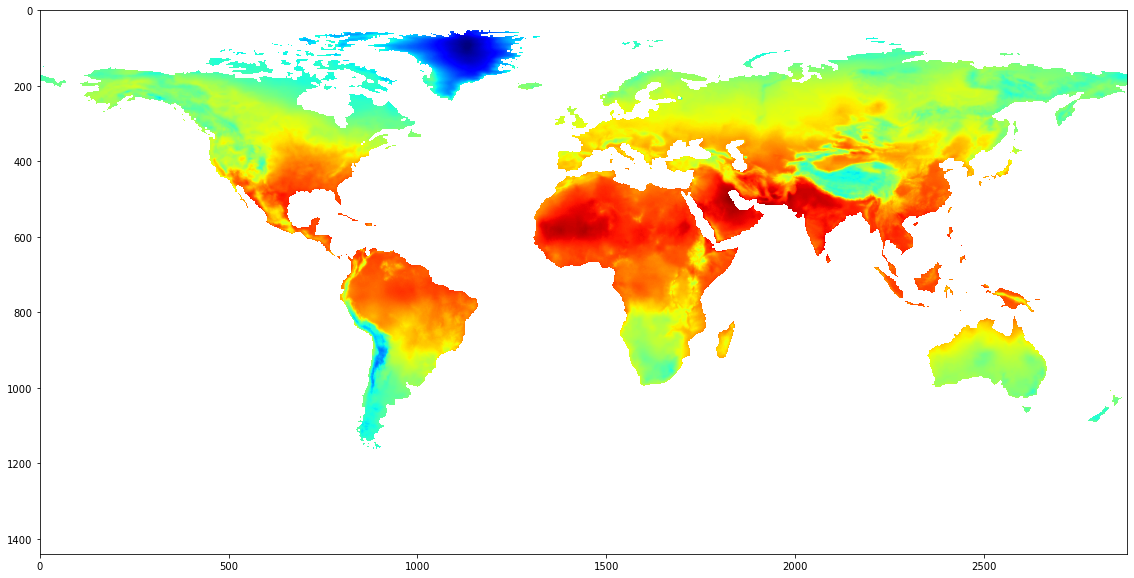

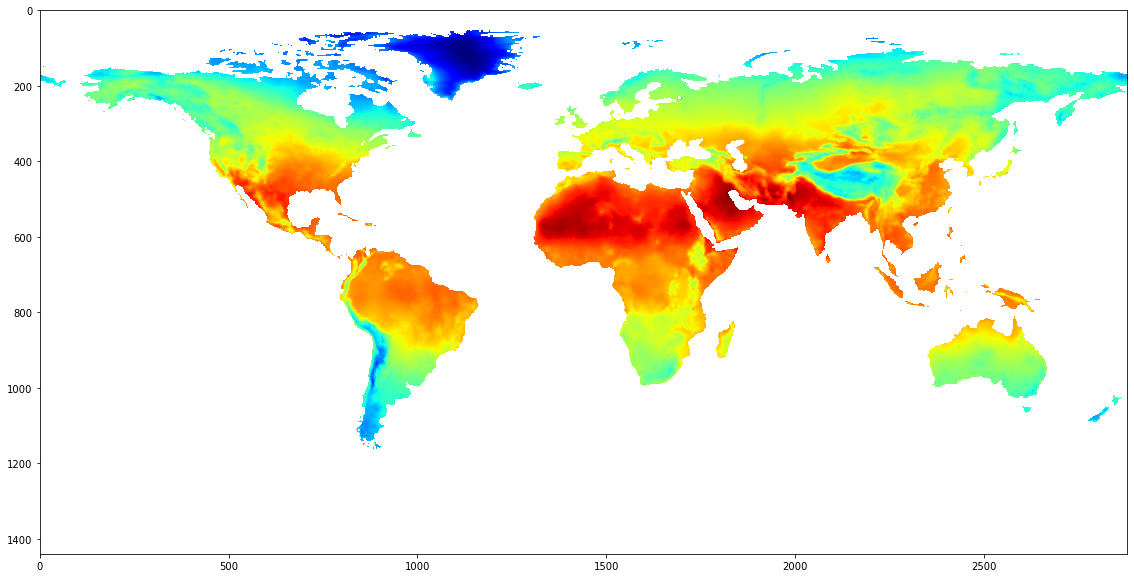

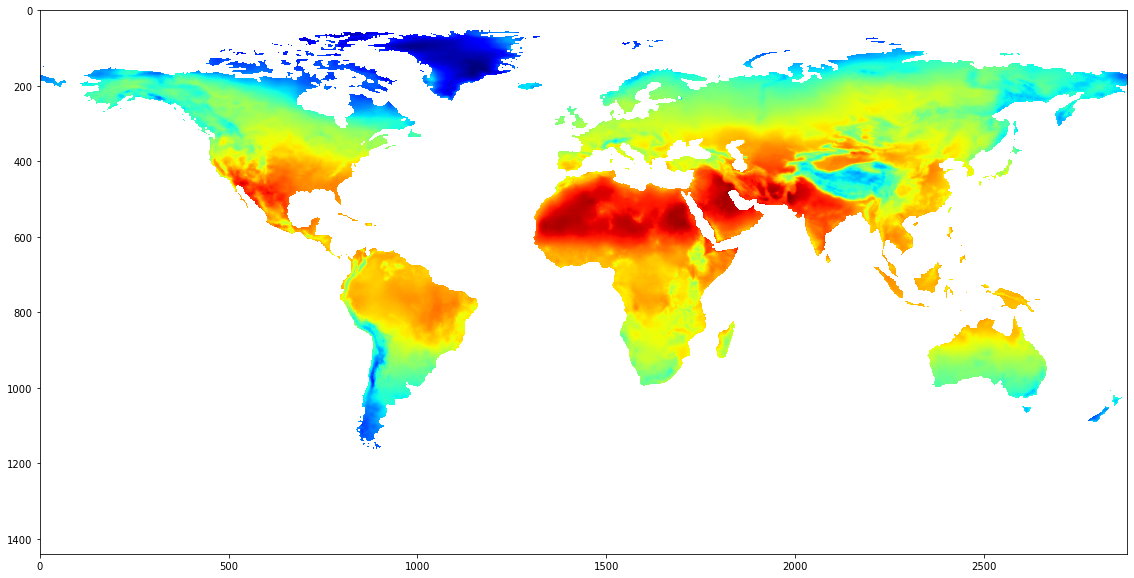

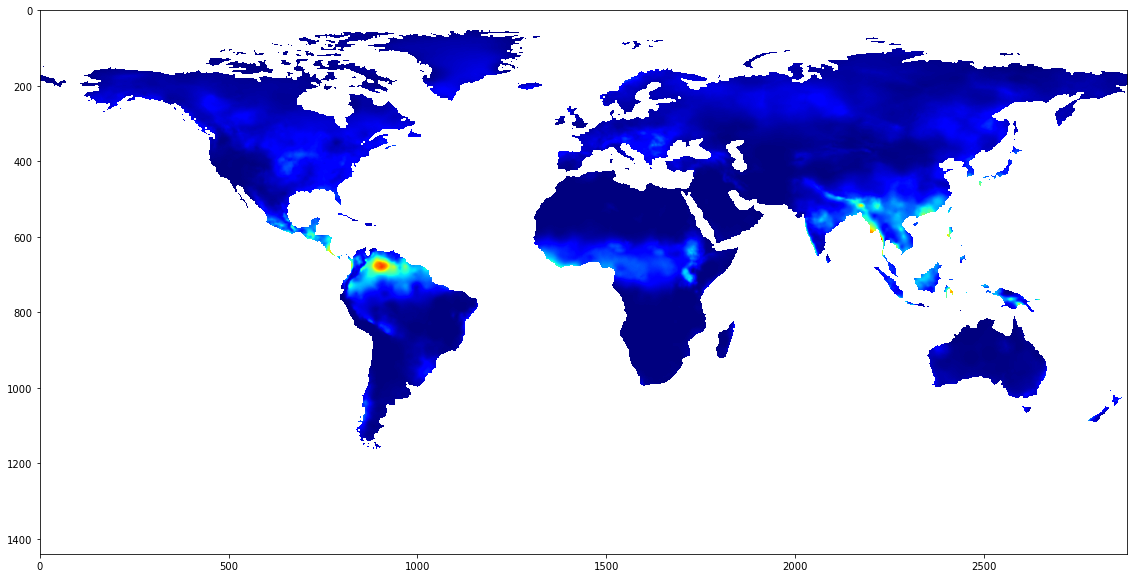

In [18]:
inference_cruts_file_pattern = (
    "/media/xultaeculcis/2TB/datasets/cruts/inference/{}/cruts-{}-2018-06-16.tif"
)

for var in ["tmn", "tmp", "tmx", "pre"]:
    with rio.open(inference_cruts_file_pattern.format(var, var)) as dataset:
        raster = dataset.read(1)

    _ = plt.figure(figsize=(20, 10))
    plt.imshow(raster, cmap="jet")
    plt.show()

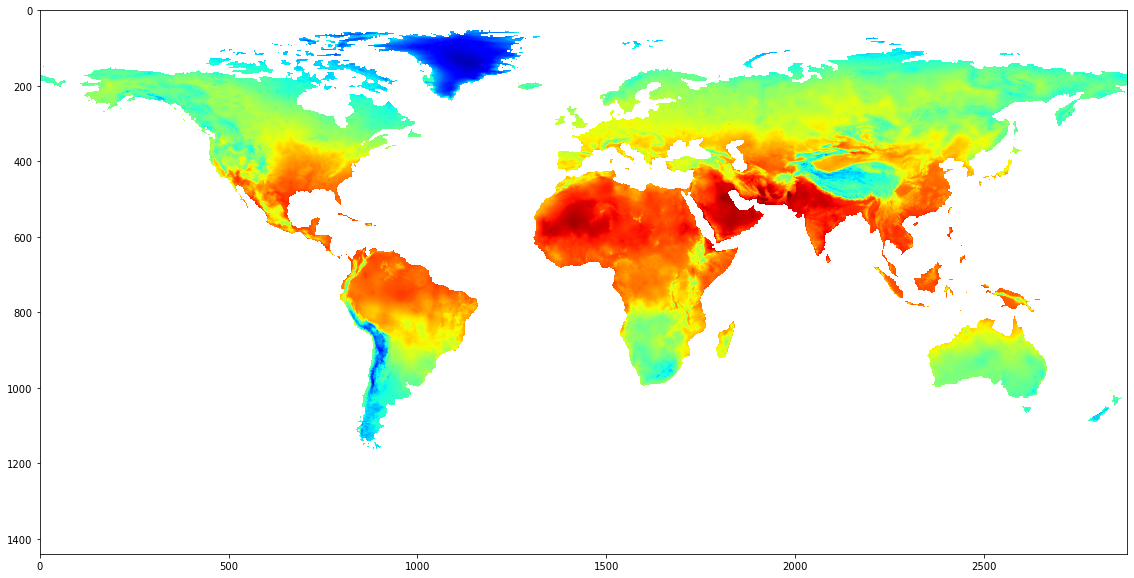

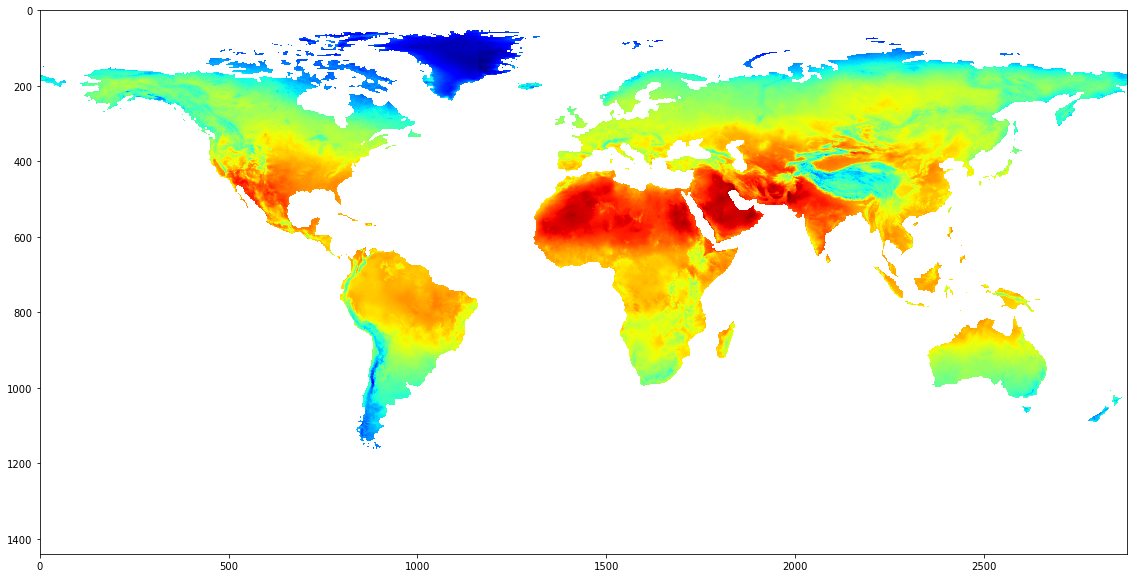

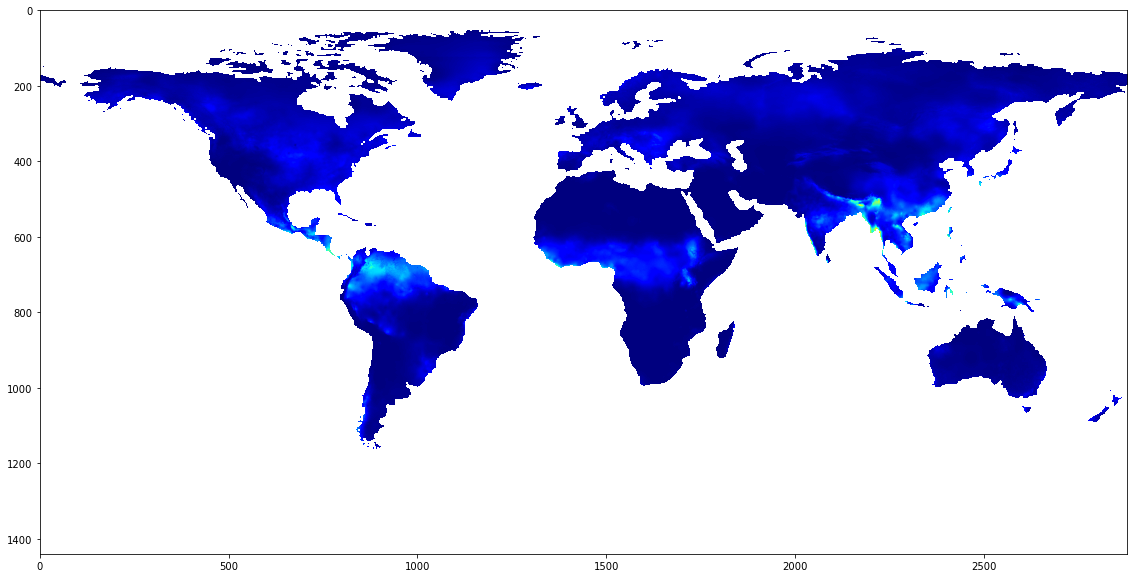

In [15]:
original_world_clim_file_pattern = "/media/xultaeculcis/2TB/datasets/wc/pre-processed/{}/resized/4x/wc2.1_2.5m_{}_2018-06.tif"
for var in ["tmin", "tmax", "prec"]:
    with rio.open(original_world_clim_file_pattern.format(var, var)) as dataset:
        raster = dataset.read(1)

    _ = plt.figure(figsize=(20, 10))
    plt.imshow(raster, cmap="jet")
    plt.show()

  Using cached opencv_python-4.5.1.48-cp38-cp38-manylinux2014_x86_64.whl (50.4 MB)
